# Titanic Survival Prediction Using Machine Learning
* we will use the Titanic dataset to build a model that predicts whether a 
passenger on the Titanic survived or no 

### Steps :
1. Explore the dataset
2. Data cleaning 
3. Data visualization
4. Feature Engineering
5. Model Trainingt

In [298]:
# Frist we will importing an important liberayies 
import numpy as np # to treat with numeric arrays 
import pandas as pd # to treat with tabels and sheet files 
import matplotlib.pyplot as plt # to visualize the data 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [299]:
data = pd.read_csv(r'Titanic-Dataset.csv') # reading the dataset 
data.head() # to show the frist 5 raws of the data 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1. Explore the dataset

In [301]:
# show the shape of data (raws,columns)
data.shape

(891, 12)

In [302]:
# Show the information of the dataset:data types and non null values 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [303]:
# show the numerical describtion for data
data.describe()  

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [304]:
# show the number of null values 
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 2.Cleaning the data

In [306]:
# As we saw the 'Cabin' column have many missing values and it is not important column so we will drop it
data.drop(['Cabin'],axis = 1,inplace = True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [307]:
# we will replace the missing values in 'Age' column with mean value
mean_age = data['Age'].mean()
round(mean_age) 

30

In [308]:
data['Age'].fillna(round(mean_age),inplace = True)
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [309]:
mode_embarked = data['Embarked'].mode()
print(mode_embarked)
data['Embarked'].fillna('S',inplace=True)

0    S
Name: Embarked, dtype: object


In [310]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [311]:
data['PassengerId'].duplicated().sum()

0

In [312]:
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [313]:
data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [314]:
data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [315]:
# we here convert the PassengerId to string as it is not a numerical value
data['PassengerId'] = data['PassengerId'].astype('str')

### 3.Data visualization

Text(0.5, 1.0, 'Survivors (1) and the dead (0)')

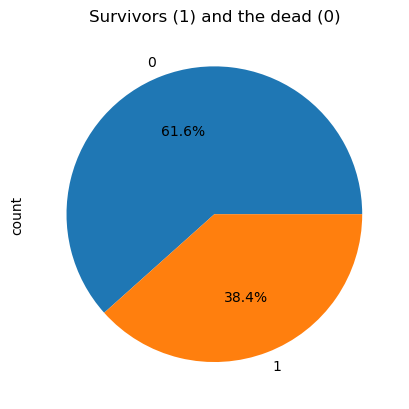

In [317]:
data['Survived'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Survivors (1) and the dead (0)')

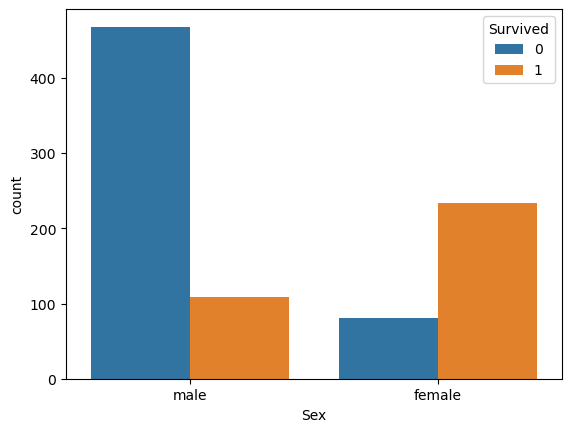

In [318]:
sns.countplot(x='Sex', hue='Survived', data=data)
plt.show()

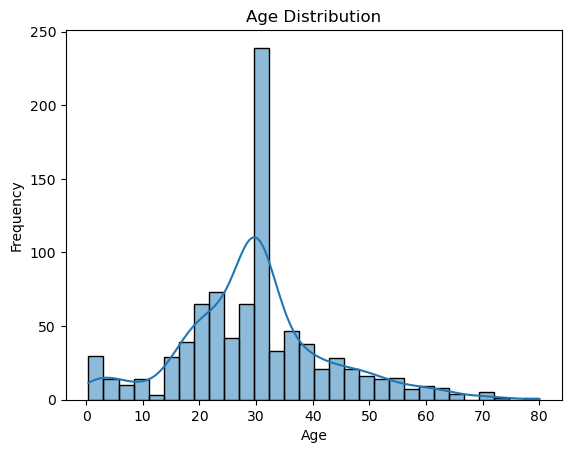

In [319]:
# Visualize the distribution of Age
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### 4. Feature Engineering

In [321]:
# Convert categorical variables to numeric
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Create a new feature: FamilySize
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

# Drop unnecessary columns
data.drop(columns=['Name', 'Ticket'], inplace=True)

# Display the first few rows of the modified dataset
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,1,0,3,0,22.0,1,0,7.2500,2,2
1,2,1,1,1,38.0,1,0,71.2833,0,2
2,3,1,3,1,26.0,0,0,7.9250,2,1
3,4,1,1,1,35.0,1,0,53.1000,2,2
4,5,0,3,0,35.0,0,0,8.0500,2,1


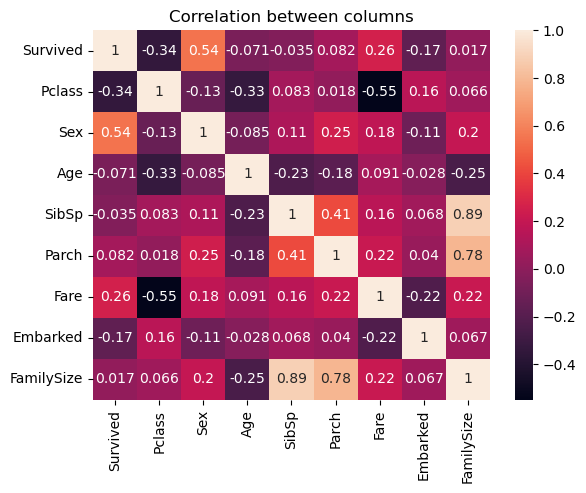

In [322]:
# Remove non-numeric columns from the dataframe
numeric_df = data.select_dtypes(include=[np.number])

# Create the heatmap using the numeric dataframe
sns.heatmap(numeric_df.corr(), annot=True)
plt.title('Correlation between columns')
plt.show()

### 5.Model Training

In [324]:
print(data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'FamilySize'],
      dtype='object')


In [327]:
predictors = data.drop(['Survived', 'PassengerId'], axis=1)
target = data["Survived"]
x_train, x_val, y_train, y_val = train_test_split(
    predictors, target, test_size=0.2, random_state=0)

In [331]:
randomforest = RandomForestClassifier()
# Fit the training data along with its output
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)

# Find the accuracy score of the model
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

82.68
